In [2]:
import numpy as np
from utils import read_configurations
from Data_load import data_load
import matplotlib.pyplot as plt

In [3]:
config = read_configurations('./config.json')
SAVE_PATH = config['SAVE_PATH'] 
n_channels = config['CHANNELS']
n_layers = config["RNDM_LAYERS"]

In [15]:
filtered_train_images_quantum_full = np.load(SAVE_PATH + "filtered_train_images_quantum_full.npy")
filtered_train_images_quantum_full_asc = np.load(SAVE_PATH + "filtered_train_images_quantum_full_asc.npy")
filtered_train_images_quantum_cnot = np.load(SAVE_PATH + "filtered_train_images_quantum_cnot.npy")
filtered_train_images_quantum_no_cnot = np.load(SAVE_PATH + "filtered_train_images_quantum_no_cnot.npy")
filtered_train_images_classical_w_pooling = np.load(SAVE_PATH + "filtered_train_images_classical_w_pooling.npy")
filtered_train_images_quantum_random = np.load(SAVE_PATH + "filtered_train_images_quantum_random.npy")

In [5]:
filtered_train_images_quantum_full.shape, filtered_train_images_quantum_cnot.shape

((60, 14, 14, 1), (60, 14, 14, 4))

### Visualizing channel outputs of the filters

**Comparing last channel outputs of all quantum filters**

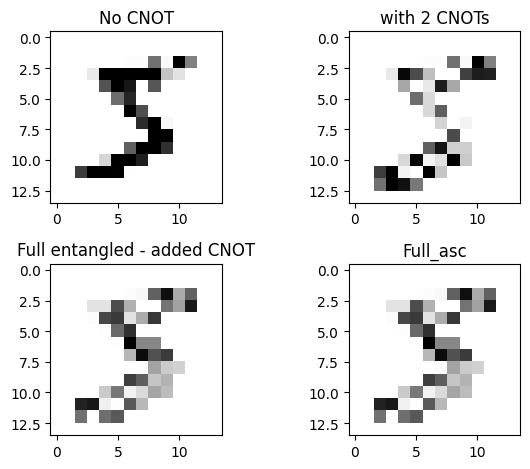

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(filtered_train_images_quantum_no_cnot[0,:,:,3], cmap='gray')
axs[0,0].set_title('No CNOT')
axs[0,1].imshow(filtered_train_images_quantum_cnot[0,:,:,3], cmap='gray')
axs[0,1].set_title('with 2 CNOTs')
axs[1,0].imshow(filtered_train_images_quantum_full[0,:,:], cmap='gray')
axs[1,0].set_title('Full entangled - added CNOT')
axs[1,1].imshow(filtered_train_images_quantum_full[0,:,:], cmap='gray')
axs[1,1].set_title('Full_asc')
fig.tight_layout()

**All 4 channel outputs for quantum filter with no CNOTs**

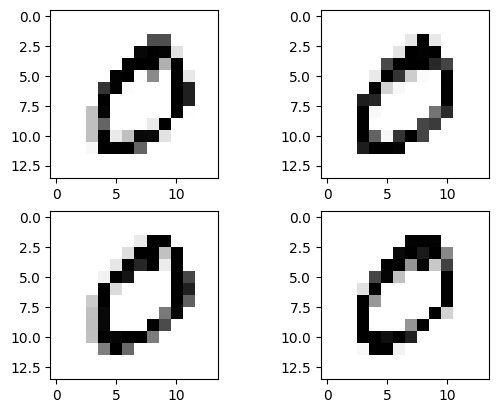

In [17]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(filtered_train_images_quantum_no_cnot[1,:,:,0], cmap='gray')
axs[0,1].imshow(filtered_train_images_quantum_no_cnot[1,:,:,1], cmap='gray')
axs[1,0].imshow(filtered_train_images_quantum_no_cnot[1,:,:,2], cmap='gray')
axs[1,1].imshow(filtered_train_images_quantum_no_cnot[1,:,:,3], cmap='gray')

**All 4 channel outputs for quantum filter with 2 CNOTs**

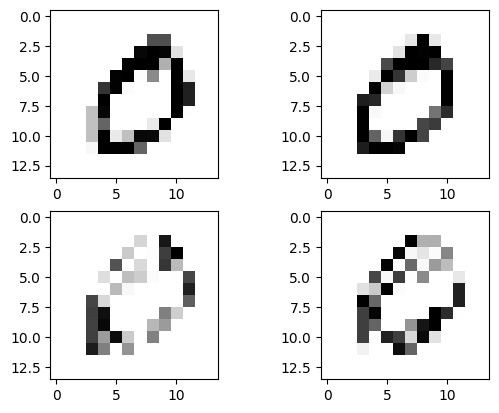

In [18]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(filtered_train_images_quantum_cnot[1,:,:,0], cmap='gray')
axs[0,1].imshow(filtered_train_images_quantum_cnot[1,:,:,1], cmap='gray')
axs[1,0].imshow(filtered_train_images_quantum_cnot[1,:,:,2], cmap='gray')
axs[1,1].imshow(filtered_train_images_quantum_cnot[1,:,:,3], cmap='gray')

**Output image for quantum filters with full entanglement**

Text(0.5, 1.0, 'Full_asc')

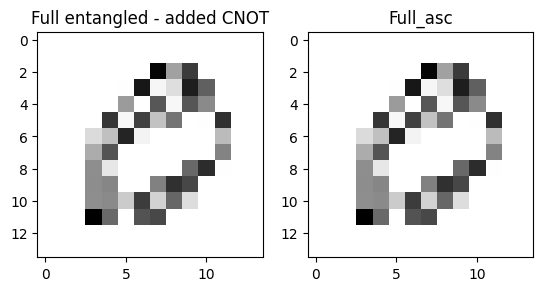

In [19]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(filtered_train_images_quantum_full[1,:,:], cmap='gray')
axs[0].set_title('Full entangled - added CNOT')
axs[1].imshow(filtered_train_images_quantum_full_asc[1,:,:], cmap='gray')
axs[1].set_title('Full_asc')

**All 4 channel outputs for random quantum filter**

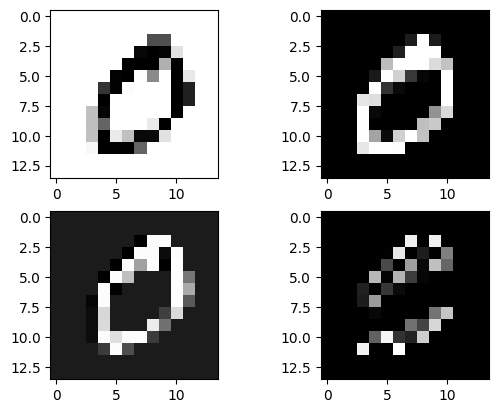

In [20]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(filtered_train_images_quantum_random[1,:,:,0], cmap='gray')
axs[0,1].imshow(filtered_train_images_quantum_random[1,:,:,1], cmap='gray')
axs[1,0].imshow(filtered_train_images_quantum_random[1,:,:,2], cmap='gray')
axs[1,1].imshow(filtered_train_images_quantum_random[1,:,:,3], cmap='gray')

### Difference in filter outputs

**Between *full* and *full_asc***

In [4]:
diff = np.where(filtered_train_images_quantum_full != filtered_train_images_quantum_full_asc)

In [5]:
diff

(array([ 0,  0,  0, ..., 59, 59, 59], dtype=int64),
 array([ 3,  3,  3, ..., 11, 11, 11], dtype=int64),
 array([4, 4, 5, ..., 5, 6, 6], dtype=int64),
 array([1, 2, 1, ..., 3, 1, 2], dtype=int64))

In [6]:
diff[0].shape, np.prod(filtered_train_images_quantum_full.shape)

((4991,), 47040)

In [7]:
filtered_train_images_quantum_full[diff[0][0], diff[1][0], diff[2][0], diff[3][0]], filtered_train_images_quantum_full_asc[diff[0][0], diff[1][0], diff[2][0], diff[3][0]]

(0.9032471993461287, 0.8422529296775253)

**Between *full* and *cnot***

In [24]:
diff = np.where(filtered_train_images_quantum_full != filtered_train_images_quantum_cnot)

In [25]:
diff[0].shape, np.prod(filtered_train_images_quantum_full.shape)

((2874,), 47040)

**Between *cnot* and *no_cnot***

In [26]:
diff = np.where(filtered_train_images_quantum_cnot != filtered_train_images_quantum_no_cnot)

In [27]:
diff[0].shape, np.prod(filtered_train_images_quantum_cnot.shape)

((4961,), 47040)

**Between *cnot* and *classical_wo_pooling***

In [25]:
filtered_train_images_classical_w_pooling.shape

(60, 14, 14)

In [26]:
diff = np.where(filtered_train_images_classical_w_pooling != filtered_train_images_quantum_cnot[:,:,:,-1])

In [27]:
diff[0].shape, np.prod(filtered_train_images_quantum_cnot[:,:,:,-1].shape)

((11754,), 11760)

### Value distribution

In [11]:
np.count_nonzero(filtered_train_images_quantum_full == 1.0)

36371

In [13]:
np.count_nonzero(filtered_train_images_quantum_full_asc == 1.0)

36098

In [14]:
np.count_nonzero(filtered_train_images_quantum_cnot == 1.0)

36468

In [15]:
np.count_nonzero(filtered_train_images_quantum_no_cnot == 1.0)

36978

In [32]:
np.count_nonzero(filtered_train_images_classical_w_pooling == 1.0), np.count_nonzero(filtered_train_images_classical_w_pooling == 0.0)

(135, 8825)

In [29]:
filtered_train_images_quantum_cnot[0,:,:,3]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.97551197,  0.97551197, -0.10452846,  0.94913494,
        -1.        ,  0.00615995,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.82325295, -0.93218918,
        -0.40097978,  0.49984823,  0.999393  ,  0.99848281, -0.49575769,
        -0.77106384, -0.73900892,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  0.3106709 ,
         0.999393  ,  0.81594916, -0.76339828,  0.3191538 ,  1.        ,
         1.        ,  1.  

In [31]:
filtered_train_images_classical_w_pooling[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.07058824, 0.07058824, 0.53333333, 0.68627451,
        1.        , 0.96862745, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.19215686, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.88235294,
        0.99215686, 0.76470588, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07058824, 0.99215686,
        0.99215686, 0.99215686, 0.77647059, 0.96862745, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0. 

#### Sample output image from classical filter with pooling

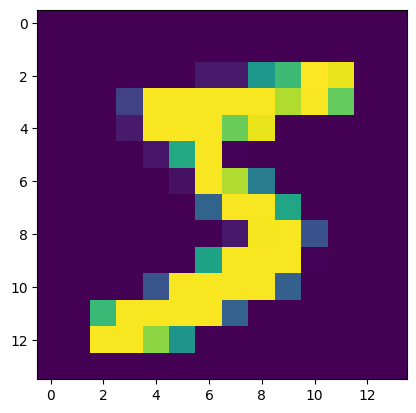

In [33]:
plt.imshow(filtered_train_images_classical_w_pooling[0,:,:])

### Testing Equivalence of filters

In [32]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter

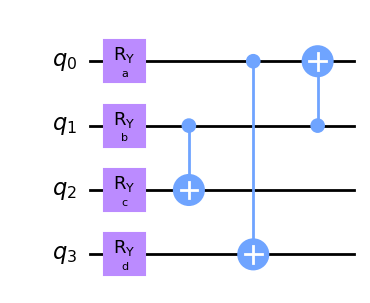

In [52]:
a,b,c,d = Parameter('a'), Parameter('b'), Parameter('c'), Parameter('d')
qc_1 = QuantumCircuit(4)
qc_1.ry(a, 0)
qc_1.ry(b, 1)
qc_1.ry(c, 2)
qc_1.ry(d, 3)
qc_1.cnot(1,2)
qc_1.cnot(0,3)
qc_1.cnot(1,0)
qc_1.draw('mpl')

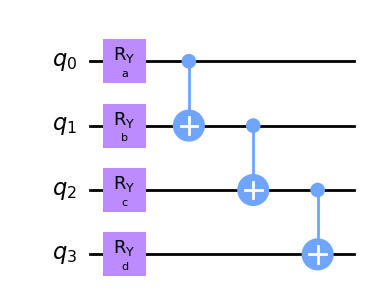

In [53]:
qc_2 = QuantumCircuit(4)
qc_2.ry(a, 0)
qc_2.ry(b, 1)
qc_2.ry(c, 2)
qc_2.ry(d, 3)
qc_2.cnot(0,1)
qc_2.cnot(1,2)
qc_2.cnot(2,3)
qc_2.draw('mpl')

In [54]:
params = np.random.rand(4)
params

array([0.68180493, 0.75605523, 0.49087752, 0.34820766])

In [55]:
qc1 = qc_1.bind_parameters(
    {a: params[0], b: params[1], c: params[2], d:params[3]})
qc2 = qc_2.bind_parameters(
    {a: params[0], b: params[1], c: params[2], d:params[3]})

In [56]:
from qiskit.quantum_info import Operator

Op1 = Operator(qc1)
Op2 = Operator(qc2)

Op1.equiv(Op2)

False